# Haar Wavelet Transformation
Implementing Haar Wavelet Transformation on the SWANSF dataset. It involves decomposing the time series into approximation and detail coefficients, which captures different frequency components.

In [1]:
#importing the libraries

import pywt
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# on one sample data point of class M and class X

df_samp_M = pd.read_csv("sample data for wavelet/M1.0@265_Primary_ar115_s2010-08-06T06_36_00_e2010-08-06T18_24_00.csv", sep='\\t')
df_samp_C = pd.read_csv("sample data for wavelet/C9.6@1454_Primary_ar401_s2011-03-11T17_36_00_e2011-03-12T05_24_00.csv", sep='\\t')

df_samp_M.shape, df_samp_C.shape

((60, 55), (60, 55))

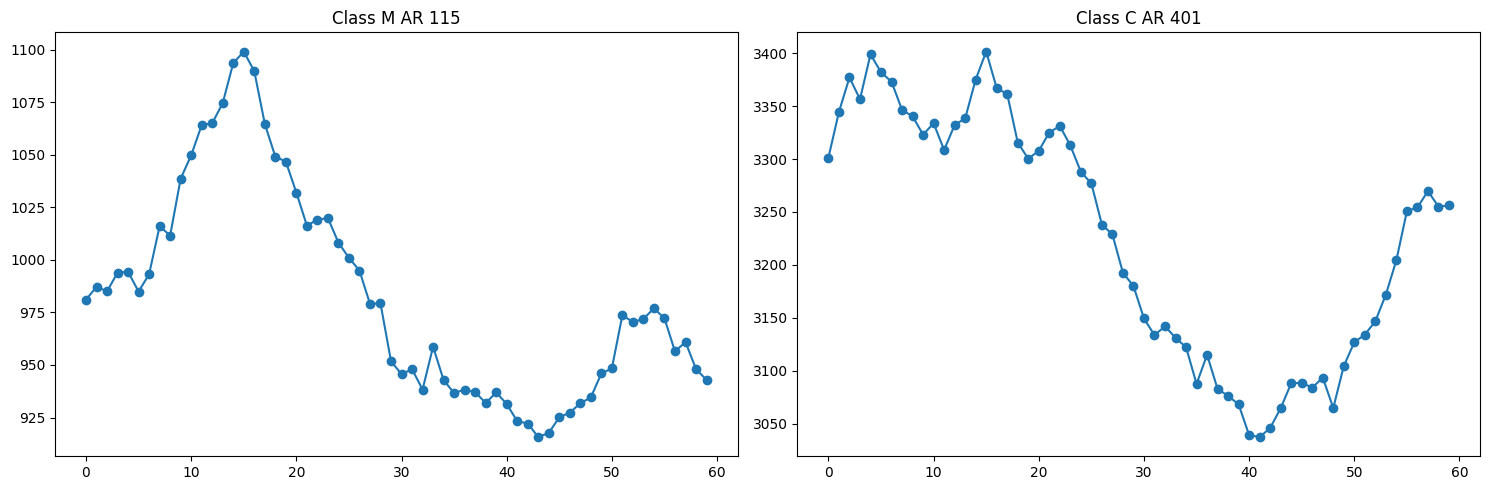

In [3]:
# A side-by-side comparison of the 'TOTUSJH' time series for Class M and Class C

series_M = df_samp_M[['Timestamp','TOTUSJH']]
series_M = series_M.dropna()

series_C = df_samp_C[['Timestamp','TOTUSJH']]
series_C = series_C.dropna()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
#axes[0].scatter(range(0,60),series_M.TOTUSJH)
axes[0].plot(series_M.TOTUSJH,marker='o')
axes[0].set_title("Class M AR 115")
axes[1].plot(series_C.TOTUSJH, marker='o')
axes[1].set_title("Class C AR 401")
fig.tight_layout()

# Haar transform

In [93]:
import matplotlib.pyplot as plt

# Extract information for plotting Class M
n_times_M = len(series_M)
time_M = range(n_times_M)
signal_M = series_M['TOTUSJH']

# Extract information for plotting Class C
n_times_C = len(series_C)
time_C = range(n_times_C)
signal_C = series_C['TOTUSJH']

In [5]:
def wavelet_denoising(x, wavelet, level):
    # Perform wavelet decomposition
    coeff = pywt.wavedec(x, wavelet, level=level)
    return coeff
    

### Visualizing the wavelet denoising process for the Class M signal at different levels using the Haar wavelet.

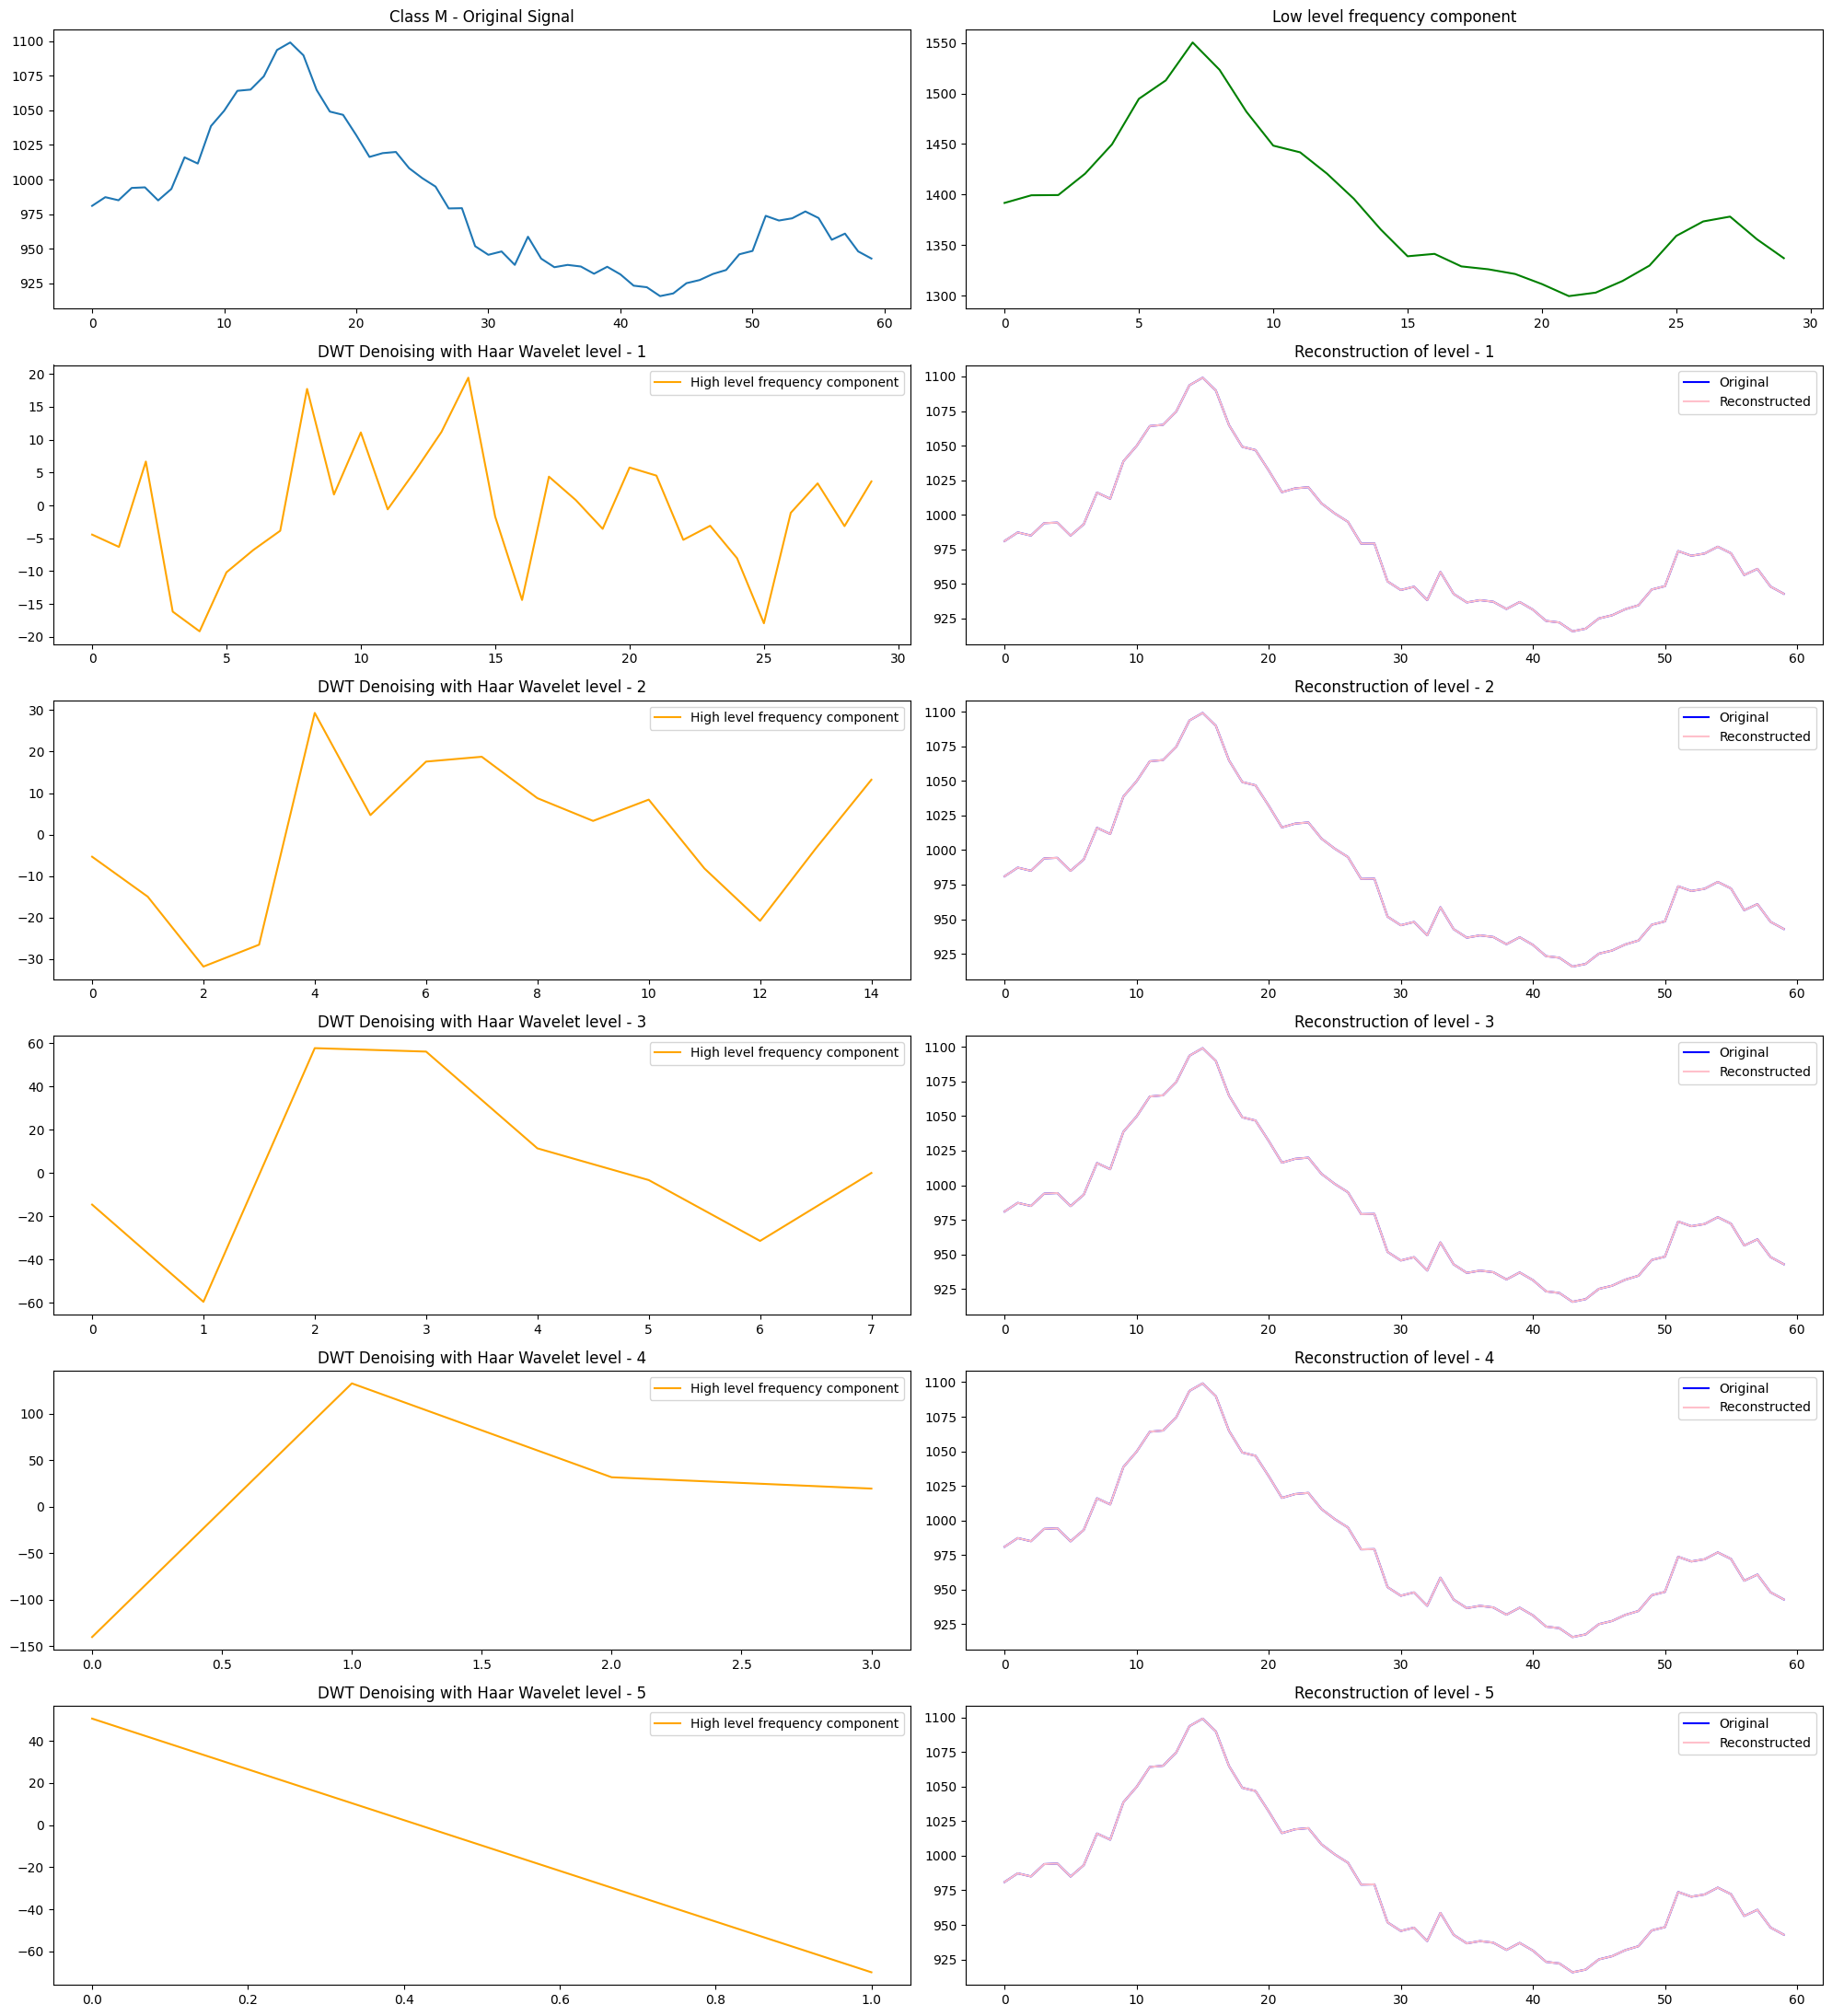

In [6]:
# Create subplots for visualizing wavelet denoising at different levels
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 22))
axes = axes.flatten()
count = 0

# Iterate through different wavelet denoising levels
for lvl in range(1, 6):
    wav = 'haar'
    
    # Apply wavelet denoising to the Class M signal
    filtered = wavelet_denoising(signal_M, wavelet=wav, level=lvl)
    recons_ = pywt.waverec(filtered, "haar")

    # Plot the original signal
    if lvl == 1:
        axes[0].plot(time_M, signal_M)
        axes[count].set_title("Class M - Original Signal")
        count += 1

        # Plot the low-level frequency component
        axes[count].plot(filtered[0], c="green")
        axes[count].set_title("Low level frequency component")
        count += 1

        # Plot the high-level frequency component
        axes[count].plot(filtered[-lvl], c="orange", label='High level frequency component')
        t = "DWT Denoising with Haar Wavelet level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

        # Plot the original and reconstructed signals
        axes[count].plot(time_M, signal_M, label="Original", c="blue")
        axes[count].plot(time_M, recons_, label='Reconstructed', c="pink")
        t = "Reconstruction of level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

    else:
        # Plot the high-level frequency component
        axes[count].plot(filtered[-lvl], c="orange", label='High level frequency component')
        t = "DWT Denoising with Haar Wavelet level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

        # Plot the original and reconstructed signals
        axes[count].plot(time_M, signal_M, label="Original", c="blue")
        axes[count].plot(time_M, recons_, label='Reconstructed', c="pink")
        t = "Reconstruction of level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

# Adjust layout for better visualization
fig.tight_layout()

### Visualizing the wavelet denoising process for the Class C signal at different levels using the Haar wavelet.

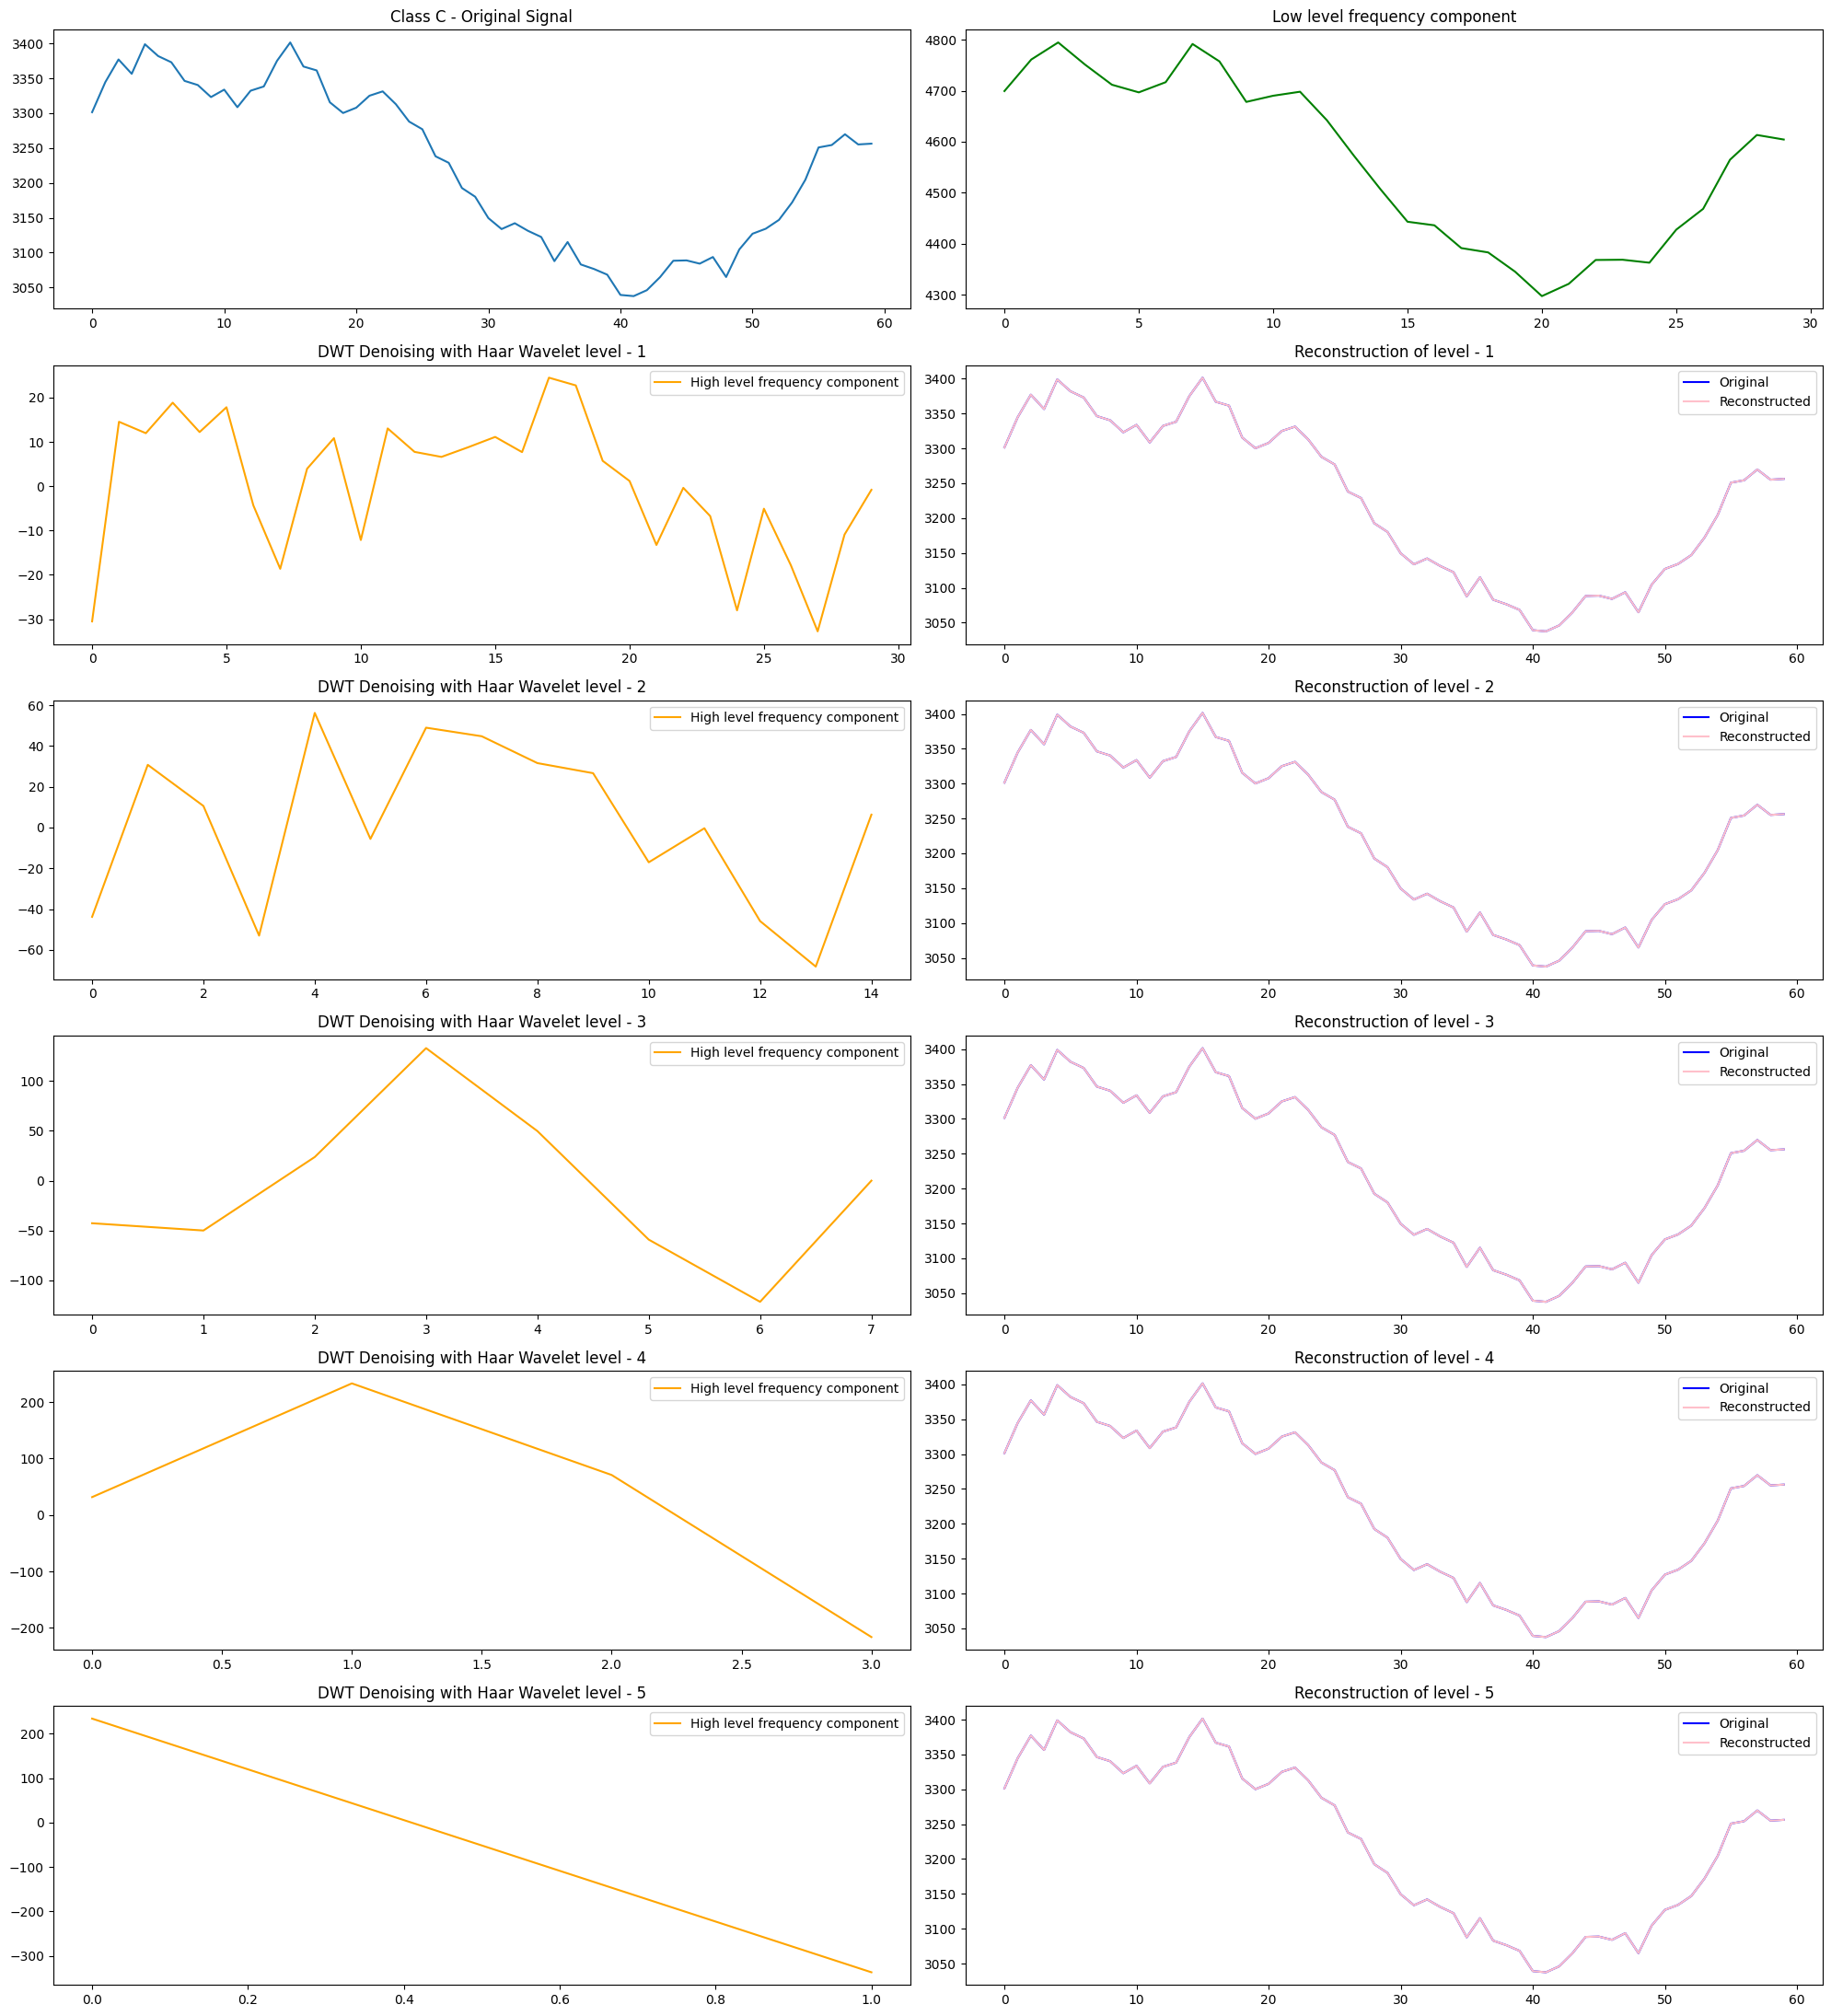

In [7]:
# Create subplots for visualizing wavelet denoising at different levels for Class C
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 22))
axes = axes.flatten()
count = 0

# Iterate through different wavelet denoising levels
for lvl in range(1, 6):
    wav = 'haar'

    # Apply wavelet denoising to the Class C signal
    filtered = wavelet_denoising(signal_C, wavelet=wav, level=lvl)
    recons_ = pywt.waverec(filtered, "haar")

    # Plot the original signal
    if lvl == 1:
        axes[count].plot(time_C, signal_C)
        axes[count].set_title("Class C - Original Signal")
        count += 1

        # Plot the low-level frequency component
        axes[count].plot(filtered[0], c="green")
        axes[count].set_title("Low level frequency component")
        count += 1

        # Plot the high-level frequency component
        axes[count].plot(filtered[-lvl], c="orange", label='High level frequency component')
        t = "DWT Denoising with Haar Wavelet level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

        # Plot the original and reconstructed signals
        axes[count].plot(time_C, signal_C, label="Original", c="blue")
        axes[count].plot(time_C, recons_, label='Reconstructed', c="pink")
        t = "Reconstruction of level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

    else:
        # Plot the high-level frequency component
        axes[count].plot(filtered[-lvl], c="orange", label='High level frequency component')
        t = "DWT Denoising with Haar Wavelet level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

        # Plot the original and reconstructed signals
        axes[count].plot(time_C, signal_C, label="Original", c="blue")
        axes[count].plot(time_C, recons_, label='Reconstructed', c="pink")
        t = "Reconstruction of level - " + str(lvl)
        axes[count].set_title(t)
        axes[count].legend()
        count += 1

# Adjust layout for better visualization
fig.tight_layout()


# lossy decomposition - Class M

In [149]:
import numpy as np
import pywt

def lossy_decomposition(signal, threshold, mode, level):
    coeffs = pywt.wavedec(signal, 'haar', level=level)
    thresholded_coeffs = [pywt.threshold(c, threshold, mode=mode) for c in coeffs]
    return thresholded_coeffs 

def lossy_reconstruction(coeffs):
    reconstructed_signal = pywt.waverec(coeffs, 'haar')
    return reconstructed_signal


In [95]:
min(signal_M), max(signal_M), np.mean(signal_M)

(915.7378430144096, 1099.1151938135365, 983.2684864537393)

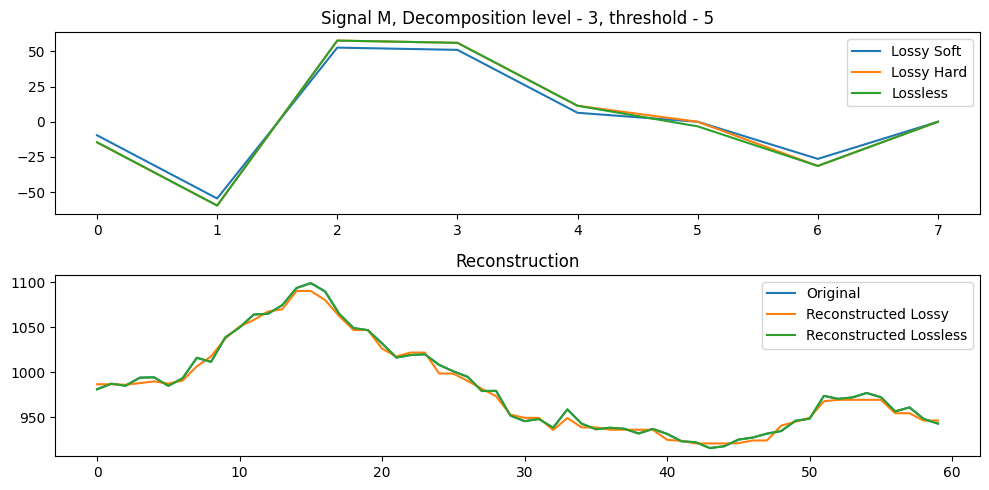

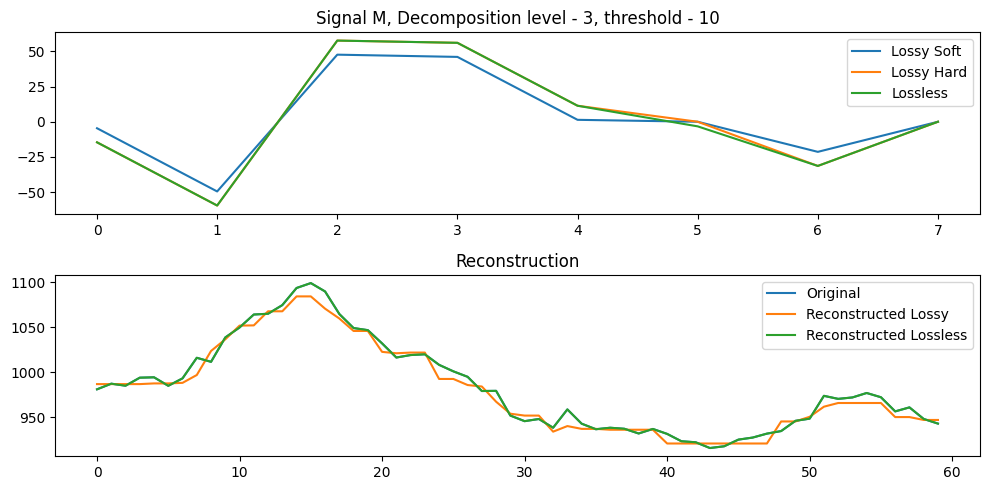

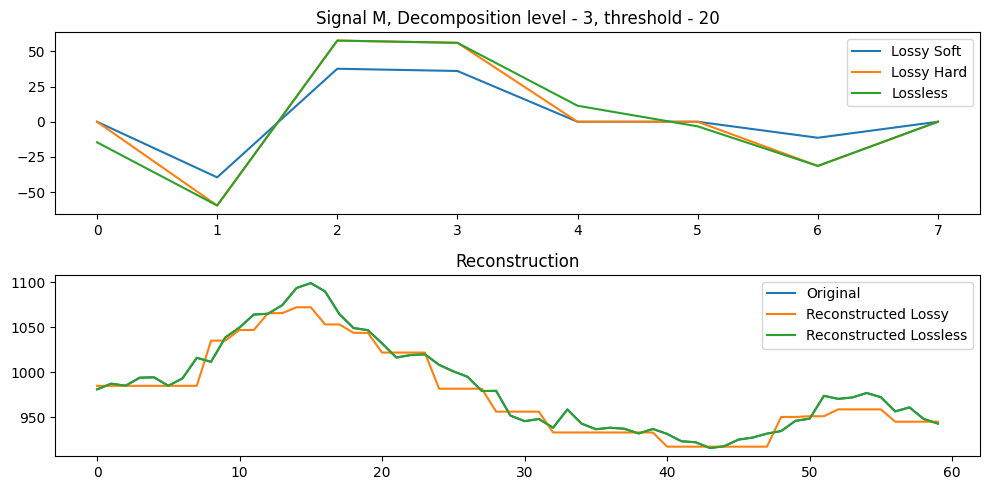

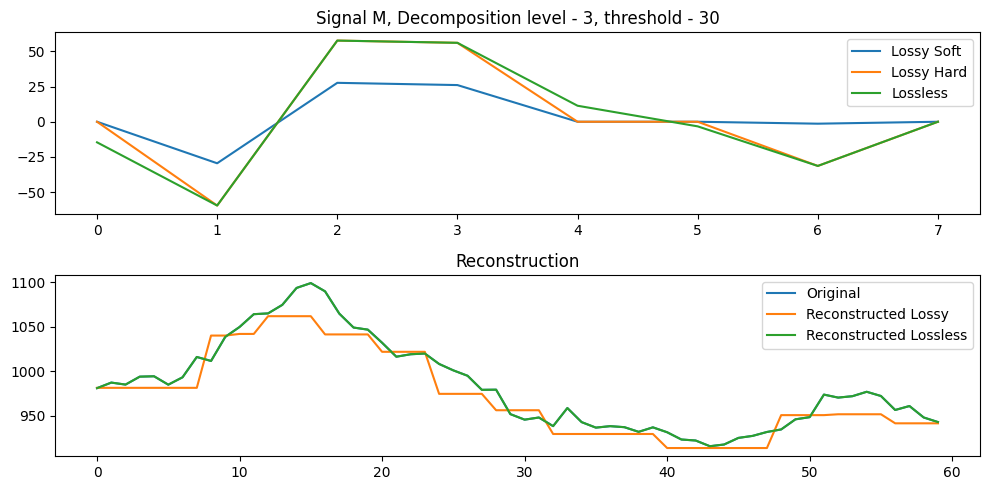

In [96]:
# Create subplots for visualizing wavelet denoising at different levels for Class C
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
axes = axes.flatten()
count = 0

threshold_value = 5

# Apply wavelet denoising to the Class M signal
filtered_lossy_soft = lossy_decomposition(signal_M, threshold_value, "soft", 3)
recons_lossy_soft = lossy_reconstruction(filtered_lossy_soft)
filtered_lossy_hard = lossy_decomposition(signal_M, threshold_value, "hard", 3)
recons_lossy_hard = lossy_reconstruction(filtered_lossy_hard)

filtered_lossless = wavelet_denoising(signal_M, wavelet="haar", level=3)
recons_lossless = pywt.waverec(filtered_lossless, "haar")


# Plot the lossy decompositions
axes[count].plot(filtered_lossy_soft[-3], label="Lossy Soft",)
axes[count].plot(filtered_lossy_hard[-3], label='Lossy Hard',)
axes[count].plot(filtered_lossless[-3], label='Lossless', )
axes[count].legend()
title = "Signal M, Decomposition level - 3, threshold - " +  str(threshold_value)
axes[count].set_title(title)
count += 1

# Plot the original and reconstructed signals
# Plot the original and reconstructed signals
axes[count].plot(time_M, signal_M, label="Original")
axes[count].plot(time_M, recons_lossy_soft, label='Reconstructed Lossy')
axes[count].plot(time_M, recons_lossless, label='Reconstructed Lossless')
axes[count].legend()
axes[count].set_title("Reconstruction")
count += 1

# Adjust layout for better visualization
fig.tight_layout()


# Create subplots for visualizing wavelet denoising at different levels for Class C
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
axes = axes.flatten()
count = 0

threshold_value = 10

# Apply wavelet denoising to the Class M signal
filtered_lossy_soft = lossy_decomposition(signal_M, threshold_value, "soft", 3)
recons_lossy_soft = lossy_reconstruction(filtered_lossy_soft)
filtered_lossy_hard = lossy_decomposition(signal_M, threshold_value, "hard", 3)
recons_lossy_hard = lossy_reconstruction(filtered_lossy_hard)

filtered_lossless = wavelet_denoising(signal_M, wavelet="haar", level=3)
recons_lossless = pywt.waverec(filtered_lossless, "haar")


# Plot the lossy decompositions
axes[count].plot(filtered_lossy_soft[-3], label="Lossy Soft",)
axes[count].plot(filtered_lossy_hard[-3], label='Lossy Hard',)
axes[count].plot(filtered_lossless[-3], label='Lossless', )
axes[count].legend()
title = "Signal M, Decomposition level - 3, threshold - " +  str(threshold_value)
axes[count].set_title(title)
count += 1

# Plot the original and reconstructed signals
# Plot the original and reconstructed signals
axes[count].plot(time_M, signal_M, label="Original")
axes[count].plot(time_M, recons_lossy_soft, label='Reconstructed Lossy')
axes[count].plot(time_M, recons_lossless, label='Reconstructed Lossless')
axes[count].legend()
axes[count].set_title("Reconstruction")
count += 1


# Adjust layout for better visualization
fig.tight_layout()

# Create subplots for visualizing wavelet denoising at different levels for Class C
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10,5))
axes = axes.flatten()
count = 0

threshold_value = 20

# Apply wavelet denoising to the Class M signal
filtered_lossy_soft = lossy_decomposition(signal_M, threshold_value, "soft", 3)
recons_lossy_soft = lossy_reconstruction(filtered_lossy_soft)
filtered_lossy_hard = lossy_decomposition(signal_M, threshold_value, "hard", 3)
recons_lossy_hard = lossy_reconstruction(filtered_lossy_hard)

filtered_lossless = wavelet_denoising(signal_M, wavelet="haar", level=3)
recons_lossless = pywt.waverec(filtered_lossless, "haar")


# Plot the lossy decompositions
axes[count].plot(filtered_lossy_soft[-3], label="Lossy Soft",)
axes[count].plot(filtered_lossy_hard[-3], label='Lossy Hard',)
axes[count].plot(filtered_lossless[-3], label='Lossless', )
axes[count].legend()
title = "Signal M, Decomposition level - 3, threshold - " +  str(threshold_value)
axes[count].set_title(title)
count += 1

# Plot the original and reconstructed signals
# Plot the original and reconstructed signals
axes[count].plot(time_M, signal_M, label="Original")
axes[count].plot(time_M, recons_lossy_soft, label='Reconstructed Lossy')
axes[count].plot(time_M, recons_lossless, label='Reconstructed Lossless')
axes[count].legend()
axes[count].set_title("Reconstruction")
count += 1

# Adjust layout for better visualization
fig.tight_layout()

# Create subplots for visualizing wavelet denoising at different levels for Class C
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
axes = axes.flatten()
count = 0

threshold_value = 30

# Apply wavelet denoising to the Class M signal
filtered_lossy_soft = lossy_decomposition(signal_M, threshold_value, "soft", 3)
recons_lossy_soft = lossy_reconstruction(filtered_lossy_soft)
filtered_lossy_hard = lossy_decomposition(signal_M, threshold_value, "hard", 3)
recons_lossy_hard = lossy_reconstruction(filtered_lossy_hard)

filtered_lossless = wavelet_denoising(signal_M, wavelet="haar", level=3)
recons_lossless = pywt.waverec(filtered_lossless, "haar")


# Plot the lossy decompositions
axes[count].plot(filtered_lossy_soft[-3], label="Lossy Soft",)
axes[count].plot(filtered_lossy_hard[-3], label='Lossy Hard',)
axes[count].plot(filtered_lossless[-3], label='Lossless', )
axes[count].legend()
title = "Signal M, Decomposition level - 3, threshold - " +  str(threshold_value)
axes[count].set_title(title)
count += 1

# Plot the original and reconstructed signals
# Plot the original and reconstructed signals
axes[count].plot(time_M, signal_M, label="Original")
axes[count].plot(time_M, recons_lossy_soft, label='Reconstructed Lossy')
axes[count].plot(time_M, recons_lossless, label='Reconstructed Lossless')
axes[count].legend()
axes[count].set_title("Reconstruction")
count += 1

# Adjust layout for better visualization
fig.tight_layout()




## Measure decomposition : Reconstruction error and Variance Retention

Variance retention is a measure used to assess the proportion of variability in the original time series that is preserved or captured by the Haar wavelet decomposition. 
The higher the proportion of variance retained, the better the decomposition captures the variability of the original time series.

In [97]:
from sklearn.metrics import mean_squared_error
from scipy.stats import entropy


In [125]:
min(signal_M), max(signal_M), np.mean(signal_M)

(915.7378430144096, 1099.1151938135365, 983.2684864537393)

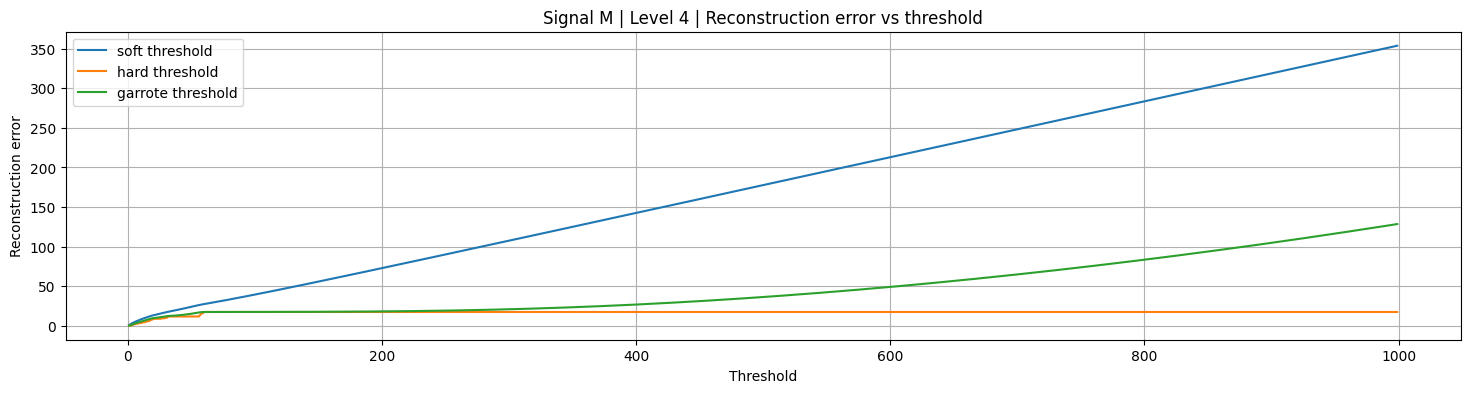

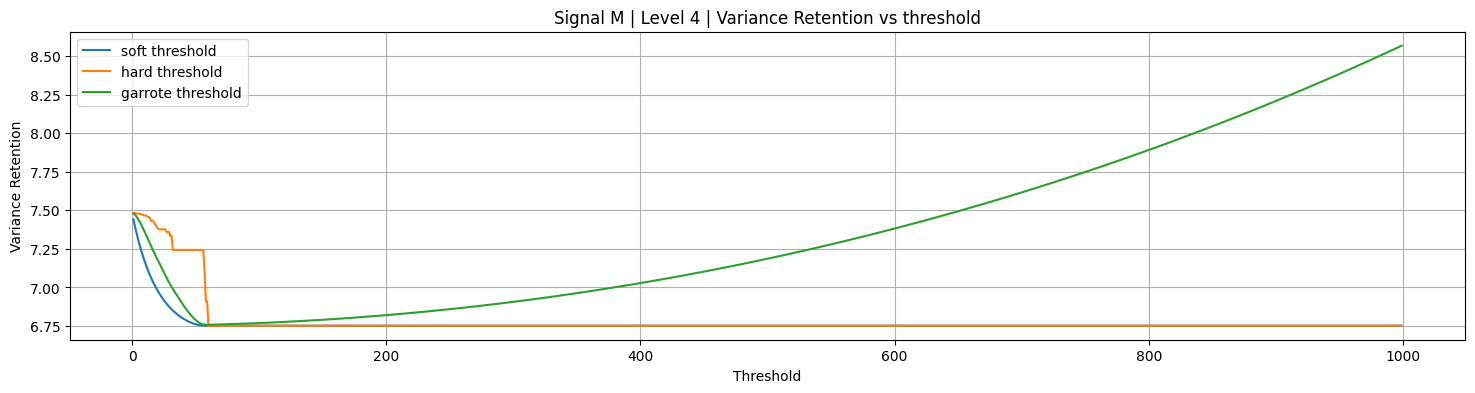

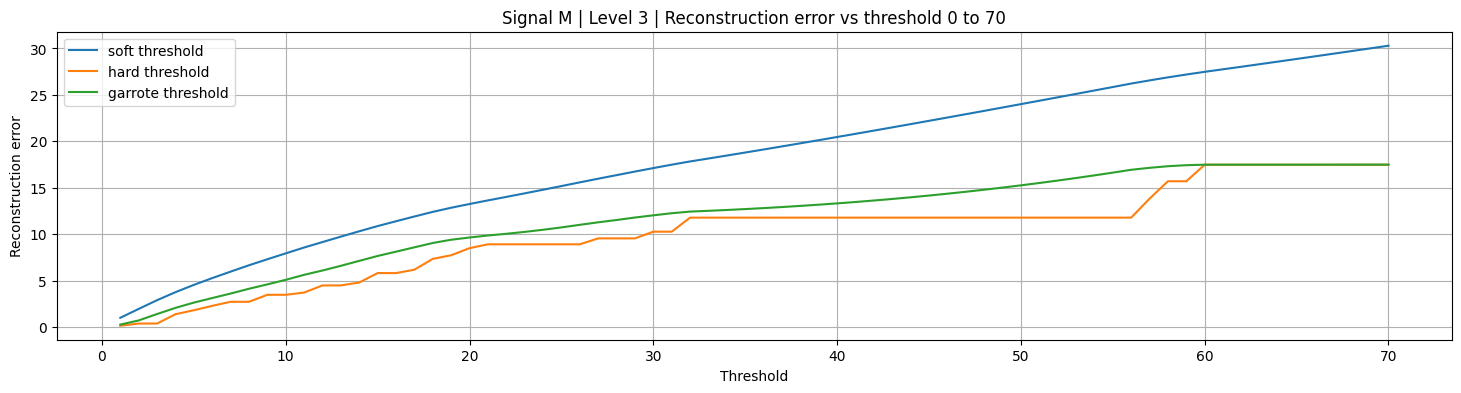

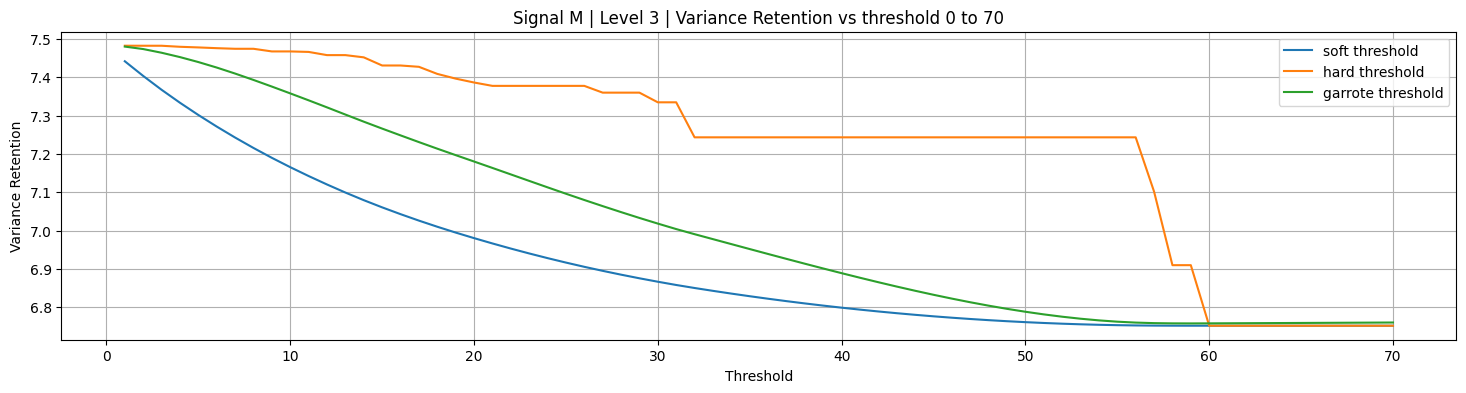

In [157]:
thresholds = []
variance_retention_soft = []
reconstruction_error_soft = []

for threshold in range(1,1000):
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(signal_M, threshold, "soft", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(signal_M, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(signal_M)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_soft.append(err)
    variance_retention_soft.append(variance_retention)

thresholds = []
variance_retention_hard = []
reconstruction_error_hard = []

for threshold in range(1,1000):
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(signal_M, threshold, "hard", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(signal_M, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(signal_M)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_hard.append(err)
    variance_retention_hard.append(variance_retention)


thresholds = []
variance_retention_garrote = []
reconstruction_error_garrote = []

for threshold in range(1,1000):
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(signal_M, threshold, "garrote", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(signal_M, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(signal_M)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_garrote.append(err)
    variance_retention_garrote.append(variance_retention)

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds, reconstruction_error_soft, label="soft threshold")
plt.plot(thresholds, reconstruction_error_hard, label="hard threshold")
plt.plot(thresholds, reconstruction_error_garrote, label="garrote threshold")
plt.title('Signal M | Level 4 | Reconstruction error vs threshold')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Reconstruction error')
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds, variance_retention_soft, label="soft threshold")
plt.plot(thresholds, variance_retention_hard, label="hard threshold")
plt.plot(thresholds, variance_retention_garrote, label="garrote threshold")
plt.title('Signal M | Level 4 | Variance Retention vs threshold')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Variance Retention')
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds[:70], reconstruction_error_soft[:70], label="soft threshold")
plt.plot(thresholds[:70], reconstruction_error_hard[:70], label="hard threshold")
plt.plot(thresholds[:70], reconstruction_error_garrote[:70], label="garrote threshold")
plt.title('Signal M | Level 3 | Reconstruction error vs threshold 0 to 70')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Reconstruction error')
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds[:70], variance_retention_soft[:70], label="soft threshold")
plt.plot(thresholds[:70], variance_retention_hard[:70], label="hard threshold")
plt.plot(thresholds[:70], variance_retention_garrote[:70], label="garrote threshold")
plt.title('Signal M | Level 3 | Variance Retention vs threshold 0 to 70')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Variance Retention')
plt.grid(True)
plt.show()

### normalize using min-max

In [129]:
# Function to normalize data using Min-Max scaling
def normalize_data(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data


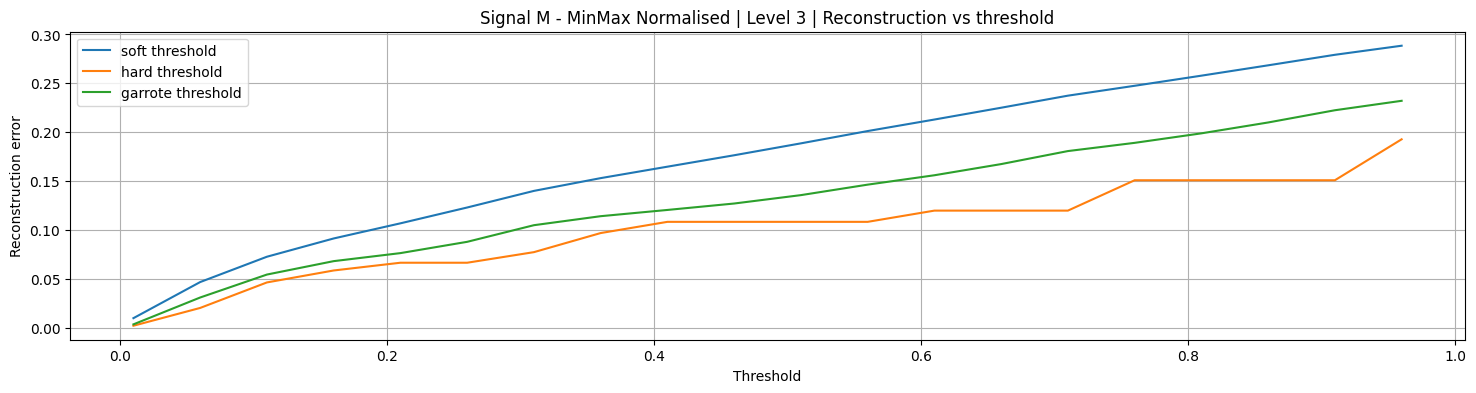

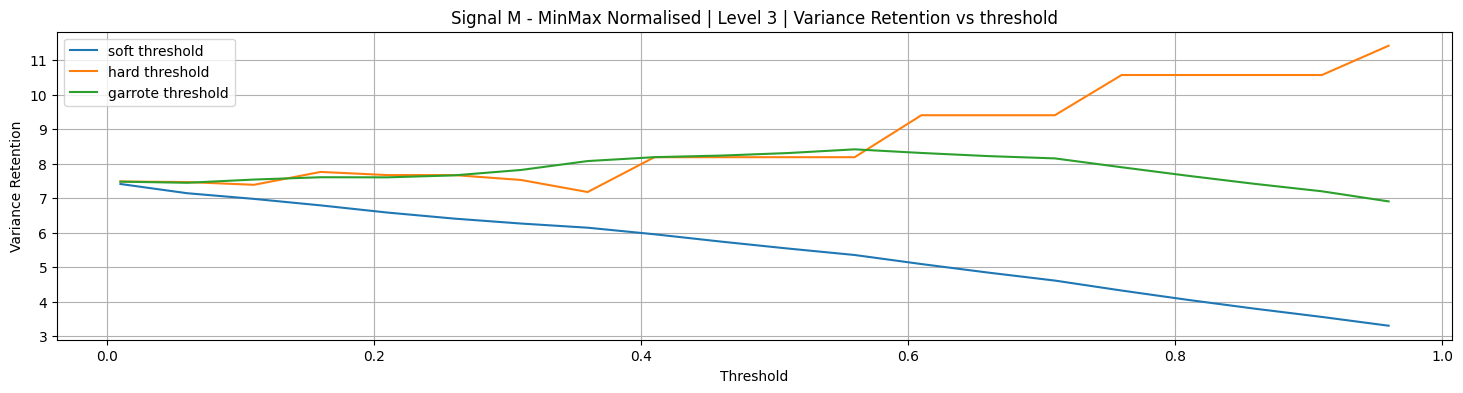

In [156]:
min_max_signal_M = normalize_data(signal_M)

thresholds = []
variance_retention_soft = []
reconstruction_error_soft = []

threshss = np.arange(0.01,1,0.05)
threshss

for threshold in threshss:
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(min_max_signal_M, threshold, "soft", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(min_max_signal_M, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(min_max_signal_M)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_soft.append(err)
    variance_retention_soft.append(variance_retention)

thresholds = []
variance_retention_hard = []
reconstruction_error_hard = []

for threshold in threshss:
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(min_max_signal_M, threshold, "hard", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(min_max_signal_M, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(min_max_signal_M)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_hard.append(err)
    variance_retention_hard.append(variance_retention)


thresholds = []
variance_retention_garrote = []
reconstruction_error_garrote = []

for threshold in threshss:
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(min_max_signal_M, threshold, "garrote", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(min_max_signal_M, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(min_max_signal_M)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_garrote.append(err)
    variance_retention_garrote.append(variance_retention)

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds, reconstruction_error_soft, label="soft threshold")
plt.plot(thresholds, reconstruction_error_hard, label="hard threshold")
plt.plot(thresholds, reconstruction_error_garrote, label="garrote threshold")
plt.title('Signal M - MinMax Normalised | Level 3 | Reconstruction vs threshold')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Reconstruction error')
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds, variance_retention_soft, label="soft threshold")
plt.plot(thresholds, variance_retention_hard, label="hard threshold")
plt.plot(thresholds, variance_retention_garrote, label="garrote threshold")
plt.title('Signal M - MinMax Normalised | Level 3 | Variance Retention vs threshold')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Variance Retention')
plt.grid(True)
plt.show()


### standardize using zscore

In [132]:
def standardize_data(data):
    mean_val = np.mean(data)
    std_dev = np.std(data)
    standardized_data = (data - mean_val) / std_dev
    return standardized_data


In [133]:
z_score_signal_M = standardize_data(signal_M)
print(min(z_score_signal_M), max(z_score_signal_M), np.mean(z_score_signal_M))


-1.3636071196774961 2.339225378311939 1.5709655798445965e-15


In [137]:
threshss = np.arange(-1.0,2.5,0.2)
threshss

array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
       -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
        6.00000000e-01,  8.00000000e-01,  1.00000000e+00,  1.20000000e+00,
        1.40000000e+00,  1.60000000e+00,  1.80000000e+00,  2.00000000e+00,
        2.20000000e+00,  2.40000000e+00])

In [148]:
z_score_signal_M

0    -0.045937
1     0.080835
2     0.035280
3     0.215566
4     0.224058
5     0.033362
6     0.200625
7     0.662063
8     0.571575
9     1.118663
10    1.342639
11    1.633318
12    1.650989
13    1.844634
14    2.229004
15    2.339225
16    2.151391
17    1.645236
18    1.329868
19    1.282515
20    0.985168
21    0.668127
22    0.723584
23    0.740618
24    0.503859
25    0.357861
26    0.235259
27   -0.083757
28   -0.080109
29   -0.635015
30   -0.760540
31   -0.711888
32   -0.907570
33   -0.496706
34   -0.816683
35   -0.941628
36   -0.908155
37   -0.931350
38   -1.037032
39   -0.935257
40   -1.046527
41   -1.211268
42   -1.234114
43   -1.363607
44   -1.324386
45   -1.174832
46   -1.128817
47   -1.040311
48   -0.982540
49   -0.753262
50   -0.703941
51   -0.191892
52   -0.260141
53   -0.227984
54   -0.127870
55   -0.223658
56   -0.541217
57   -0.451227
58   -0.710999
59   -0.815098
Name: TOTUSJH, dtype: float64

In [147]:
coeffs.fillna(0)

AttributeError: 'list' object has no attribute 'fillna'

In [144]:
thresholds = []
variance_retention_soft = []
reconstruction_error_soft = []


for threshold in threshss:
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(z_score_signal_M, threshold, "soft", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(z_score_signal_M, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(z_score_signal_M)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_soft.append(err)
    variance_retention_soft.append(variance_retention)

thresholds = []
variance_retention_hard = []
reconstruction_error_hard = []

for threshold in threshss:
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(z_score_signal_M, threshold, "hard", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(z_score_signal_M, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(z_score_signal_M)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_hard.append(err)
    variance_retention_hard.append(variance_retention)


thresholds = []
variance_retention_garrote = []
reconstruction_error_garrote = []

for threshold in threshss:
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(z_score_signal_M, threshold, "garrote", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(z_score_signal_M, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(z_score_signal_M)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_garrote.append(err)
    variance_retention_garrote.append(variance_retention)

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds, reconstruction_error_soft, label="soft threshold")
plt.plot(thresholds, reconstruction_error_hard, label="hard threshold")
plt.plot(thresholds, reconstruction_error_garrote, label="garrote threshold")
plt.title('Signal M - Z-Score Standardized | Level 4 | Reconstruction error hard, soft threhsold')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Reconstruction error')
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds, variance_retention_soft, label="soft threshold")
plt.plot(thresholds, variance_retention_hard, label="hard threshold")
plt.plot(thresholds, variance_retention_garrote, label="garrote threshold")
plt.title('Signal M - Z-Score Standardized | Level 4 | Variance Retention vs threhsold')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Variance Retention')
plt.grid(True)
plt.show()


ValueError: Input contains NaN.

# Lossy Decomposition - Class C

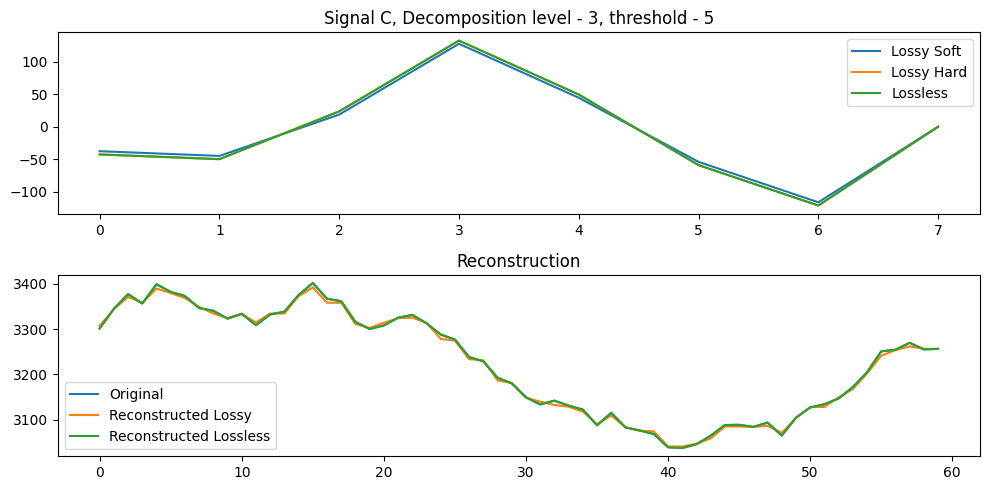

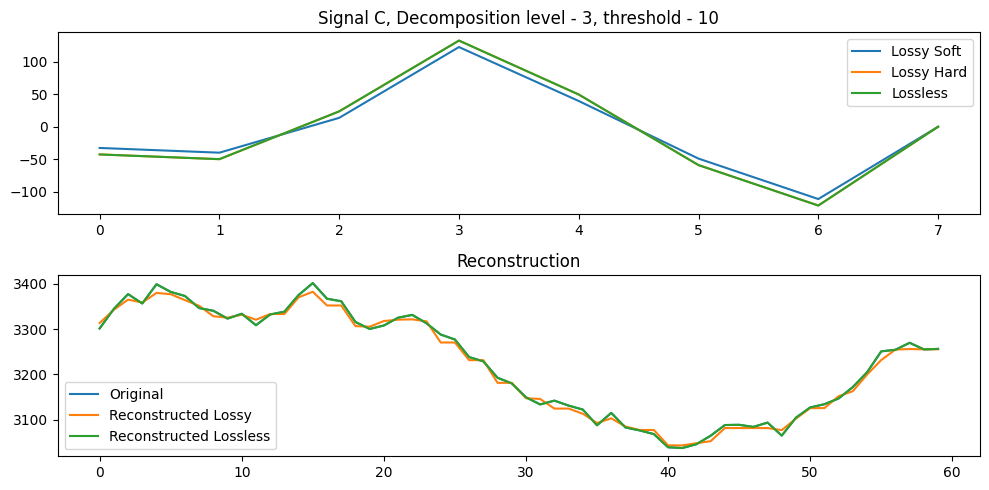

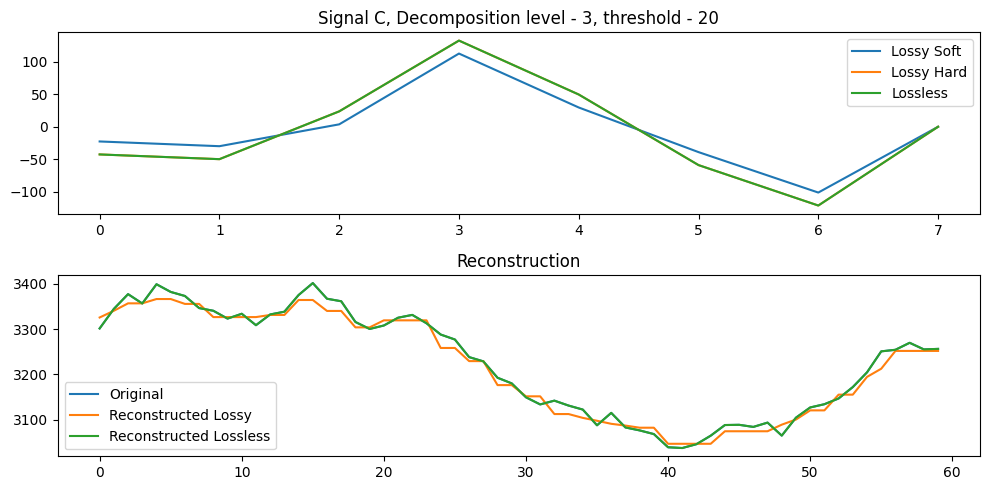

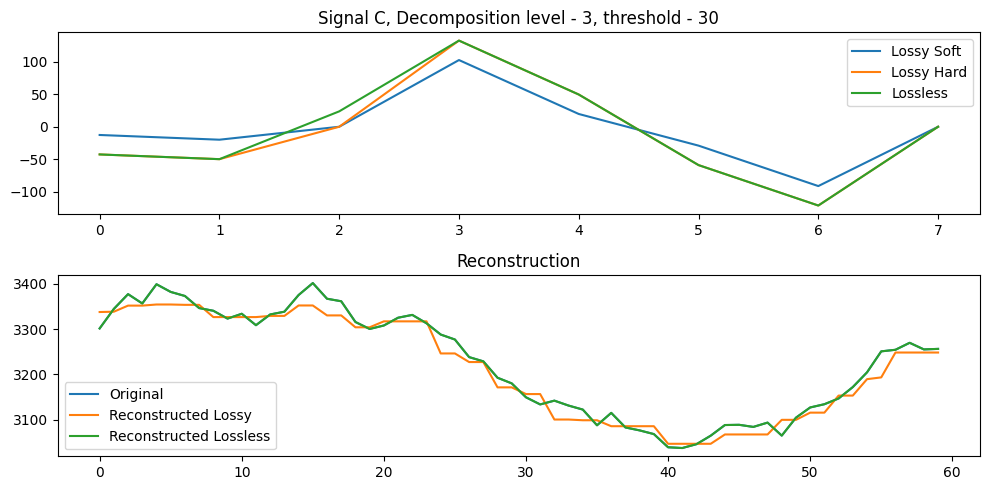

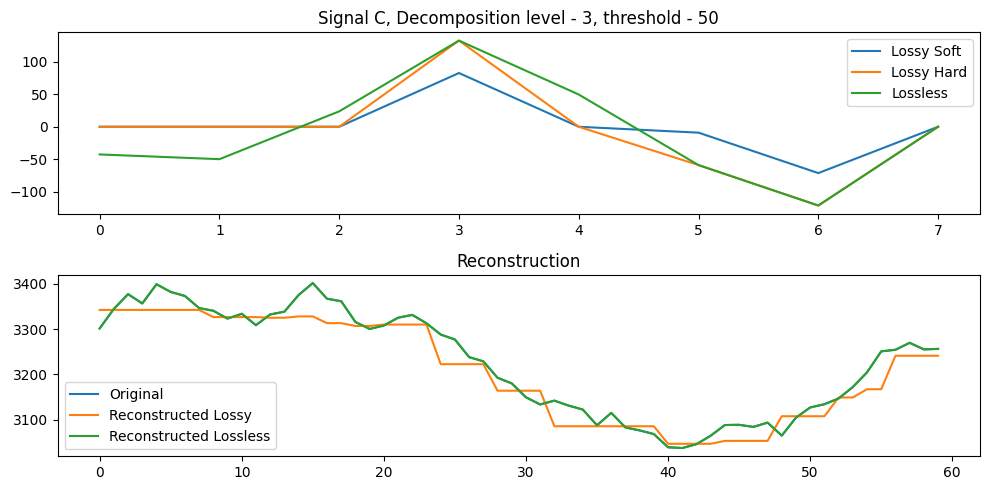

In [150]:
# Create subplots for visualizing wavelet denoising at different levels for Class C
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
axes = axes.flatten()
count = 0

threshold_value = 5

# Apply wavelet denoising to the Class M signal
filtered_lossy_soft = lossy_decomposition(signal_C, threshold_value, "soft", 3)
recons_lossy_soft = lossy_reconstruction(filtered_lossy_soft)
filtered_lossy_hard = lossy_decomposition(signal_C, threshold_value, "hard", 3)
recons_lossy_hard = lossy_reconstruction(filtered_lossy_hard)

filtered_lossless = wavelet_denoising(signal_C, wavelet="haar", level=3)
recons_lossless = pywt.waverec(filtered_lossless, "haar")


# Plot the lossy decompositions
axes[count].plot(filtered_lossy_soft[-3], label="Lossy Soft",)
axes[count].plot(filtered_lossy_hard[-3], label='Lossy Hard',)
axes[count].plot(filtered_lossless[-3], label='Lossless', )
axes[count].legend()
title = "Signal C, Decomposition level - 3, threshold - " +  str(threshold_value)
axes[count].set_title(title)
count += 1

# Plot the original and reconstructed signals
# Plot the original and reconstructed signals
axes[count].plot(time_M, signal_C, label="Original")
axes[count].plot(time_M, recons_lossy_soft, label='Reconstructed Lossy')
axes[count].plot(time_M, recons_lossless, label='Reconstructed Lossless')
axes[count].legend()
axes[count].set_title("Reconstruction")
count += 1

# Adjust layout for better visualization
fig.tight_layout()


# Create subplots for visualizing wavelet denoising at different levels for Class C
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
axes = axes.flatten()
count = 0

threshold_value = 10

# Apply wavelet denoising to the Class M signal
filtered_lossy_soft = lossy_decomposition(signal_C, threshold_value, "soft", 3)
recons_lossy_soft = lossy_reconstruction(filtered_lossy_soft)
filtered_lossy_hard = lossy_decomposition(signal_C, threshold_value, "hard", 3)
recons_lossy_hard = lossy_reconstruction(filtered_lossy_hard)

filtered_lossless = wavelet_denoising(signal_C, wavelet="haar", level=3)
recons_lossless = pywt.waverec(filtered_lossless, "haar")


# Plot the lossy decompositions
axes[count].plot(filtered_lossy_soft[-3], label="Lossy Soft",)
axes[count].plot(filtered_lossy_hard[-3], label='Lossy Hard',)
axes[count].plot(filtered_lossless[-3], label='Lossless', )
axes[count].legend()
title = "Signal C, Decomposition level - 3, threshold - " +  str(threshold_value)
axes[count].set_title(title)
count += 1

# Plot the original and reconstructed signals
# Plot the original and reconstructed signals
axes[count].plot(time_M, signal_C, label="Original")
axes[count].plot(time_M, recons_lossy_soft, label='Reconstructed Lossy')
axes[count].plot(time_M, recons_lossless, label='Reconstructed Lossless')
axes[count].legend()
axes[count].set_title("Reconstruction")
count += 1


# Adjust layout for better visualization
fig.tight_layout()

# Create subplots for visualizing wavelet denoising at different levels for Class C
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10,5))
axes = axes.flatten()
count = 0

threshold_value = 20

# Apply wavelet denoising to the Class M signal
filtered_lossy_soft = lossy_decomposition(signal_C, threshold_value, "soft", 3)
recons_lossy_soft = lossy_reconstruction(filtered_lossy_soft)
filtered_lossy_hard = lossy_decomposition(signal_C, threshold_value, "hard", 3)
recons_lossy_hard = lossy_reconstruction(filtered_lossy_hard)

filtered_lossless = wavelet_denoising(signal_C, wavelet="haar", level=3)
recons_lossless = pywt.waverec(filtered_lossless, "haar")


# Plot the lossy decompositions
axes[count].plot(filtered_lossy_soft[-3], label="Lossy Soft",)
axes[count].plot(filtered_lossy_hard[-3], label='Lossy Hard',)
axes[count].plot(filtered_lossless[-3], label='Lossless', )
axes[count].legend()
title = "Signal C, Decomposition level - 3, threshold - " +  str(threshold_value)
axes[count].set_title(title)
count += 1

# Plot the original and reconstructed signals
# Plot the original and reconstructed signals
axes[count].plot(time_M, signal_C, label="Original")
axes[count].plot(time_M, recons_lossy_soft, label='Reconstructed Lossy')
axes[count].plot(time_M, recons_lossless, label='Reconstructed Lossless')
axes[count].legend()
axes[count].set_title("Reconstruction")
count += 1

# Adjust layout for better visualization
fig.tight_layout()

# Create subplots for visualizing wavelet denoising at different levels for Class C
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
axes = axes.flatten()
count = 0

threshold_value = 30

# Apply wavelet denoising to the Class M signal
filtered_lossy_soft = lossy_decomposition(signal_C, threshold_value, "soft", 3)
recons_lossy_soft = lossy_reconstruction(filtered_lossy_soft)
filtered_lossy_hard = lossy_decomposition(signal_C, threshold_value, "hard", 3)
recons_lossy_hard = lossy_reconstruction(filtered_lossy_hard)

filtered_lossless = wavelet_denoising(signal_C, wavelet="haar", level=3)
recons_lossless = pywt.waverec(filtered_lossless, "haar")


# Plot the lossy decompositions
axes[count].plot(filtered_lossy_soft[-3], label="Lossy Soft",)
axes[count].plot(filtered_lossy_hard[-3], label='Lossy Hard',)
axes[count].plot(filtered_lossless[-3], label='Lossless', )
axes[count].legend()
title = "Signal C, Decomposition level - 3, threshold - " +  str(threshold_value)
axes[count].set_title(title)
count += 1

# Plot the original and reconstructed signals
# Plot the original and reconstructed signals
axes[count].plot(time_M, signal_C, label="Original")
axes[count].plot(time_M, recons_lossy_soft, label='Reconstructed Lossy')
axes[count].plot(time_M, recons_lossless, label='Reconstructed Lossless')
axes[count].legend()
axes[count].set_title("Reconstruction")
count += 1

# Adjust layout for better visualization
fig.tight_layout()

# Create subplots for visualizing wavelet denoising at different levels for Class C
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5))
axes = axes.flatten()
count = 0

threshold_value = 50

# Apply wavelet denoising to the Class M signal
filtered_lossy_soft = lossy_decomposition(signal_C, threshold_value, "soft", 3)
recons_lossy_soft = lossy_reconstruction(filtered_lossy_soft)
filtered_lossy_hard = lossy_decomposition(signal_C, threshold_value, "hard", 3)
recons_lossy_hard = lossy_reconstruction(filtered_lossy_hard)

filtered_lossless = wavelet_denoising(signal_C, wavelet="haar", level=3)
recons_lossless = pywt.waverec(filtered_lossless, "haar")


# Plot the lossy decompositions
axes[count].plot(filtered_lossy_soft[-3], label="Lossy Soft",)
axes[count].plot(filtered_lossy_hard[-3], label='Lossy Hard',)
axes[count].plot(filtered_lossless[-3], label='Lossless', )
axes[count].legend()
title = "Signal C, Decomposition level - 3, threshold - " +  str(threshold_value)
axes[count].set_title(title)
count += 1

# Plot the original and reconstructed signals
# Plot the original and reconstructed signals
axes[count].plot(time_M, signal_C, label="Original")
axes[count].plot(time_M, recons_lossy_soft, label='Reconstructed Lossy')
axes[count].plot(time_M, recons_lossless, label='Reconstructed Lossless')
axes[count].legend()
axes[count].set_title("Reconstruction")
count += 1

# Adjust layout for better visualization
fig.tight_layout()




## Measure decomposition : Reconstruction error and Variance Retention

Variance retention is a measure used to assess the proportion of variability in the original time series that is preserved or captured by the Haar wavelet decomposition. 
The higher the proportion of variance retained, the better the decomposition captures the variability of the original time series.

In [113]:

min(signal_C), max(signal_C), np.mean(signal_C)

(3037.604053920345, 3401.402127405561, 3225.837756823487)

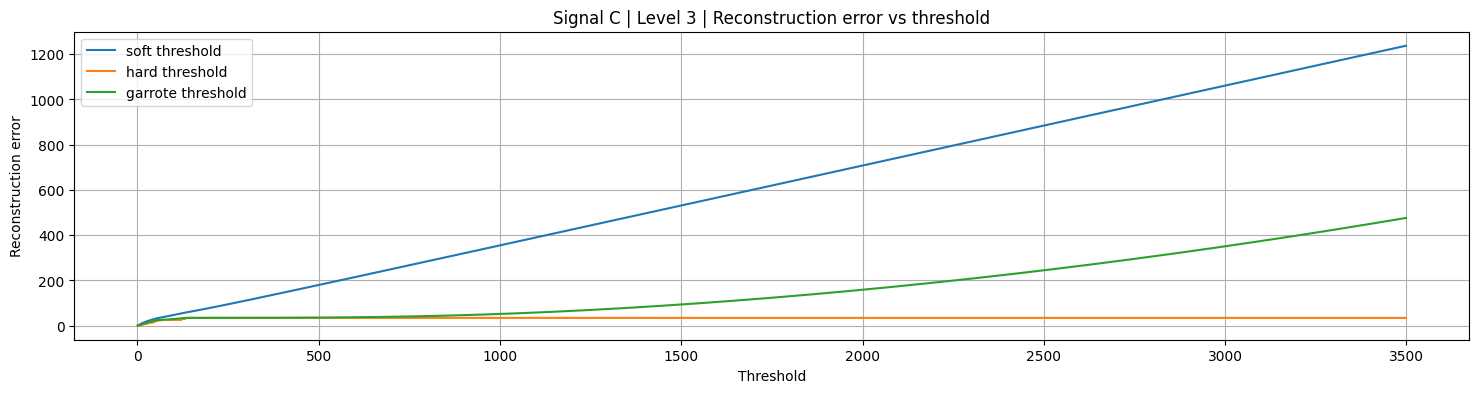

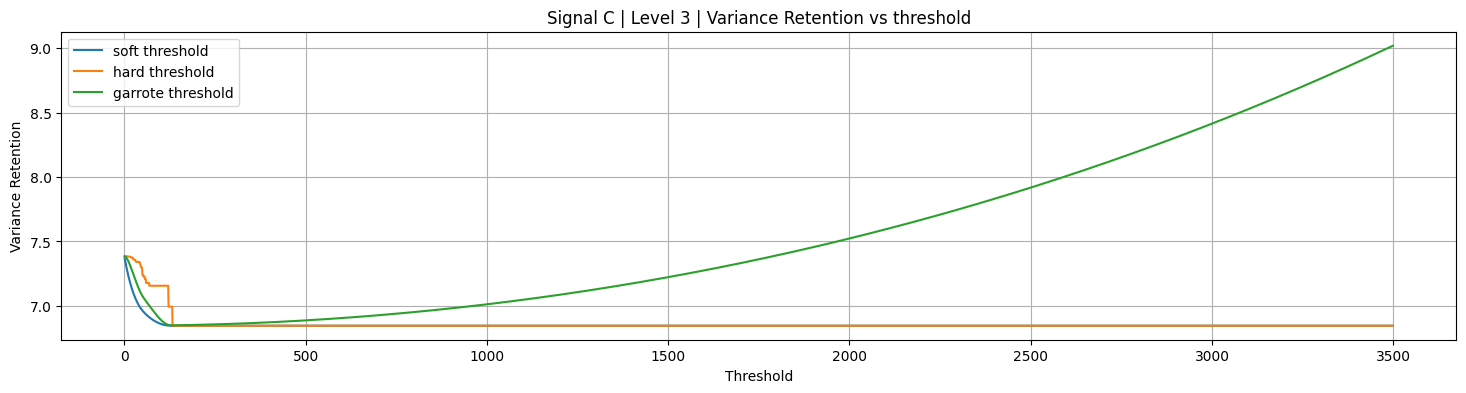

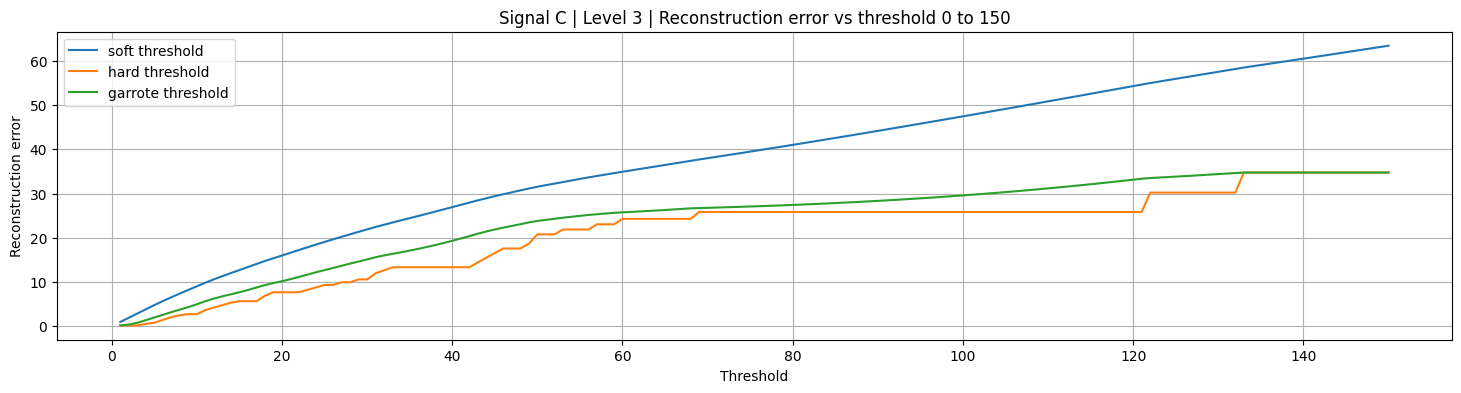

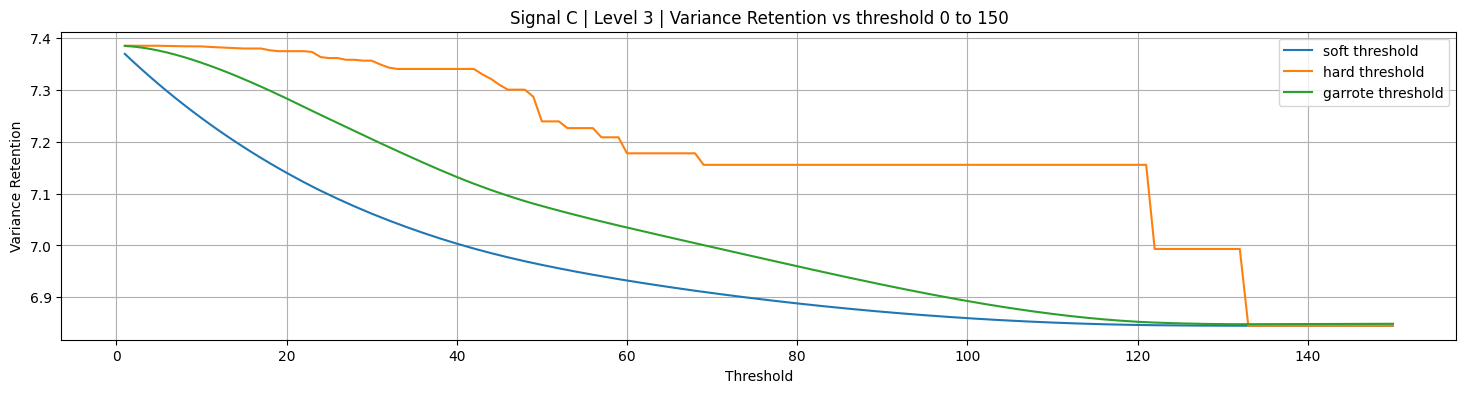

In [155]:
from sklearn.metrics import mean_squared_error
from scipy.stats import entropy

thresholds = []
variance_retention_soft = []
reconstruction_error_soft = []

for threshold in range(1,3500):
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(signal_C, threshold, "soft", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(signal_C, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(signal_C)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_soft.append(err)
    variance_retention_soft.append(variance_retention)

thresholds = []
variance_retention_hard = []
reconstruction_error_hard = []

for threshold in range(1,3500):
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(signal_C, threshold, "hard", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(signal_C, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(signal_C)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_hard.append(err)
    variance_retention_hard.append(variance_retention)


thresholds = []
variance_retention_garrote = []
reconstruction_error_garrote = []

for threshold in range(1,3500):
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(signal_C, threshold, "garrote", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(signal_C, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(signal_C)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_garrote.append(err)
    variance_retention_garrote.append(variance_retention)

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds, reconstruction_error_soft, label="soft threshold")
plt.plot(thresholds, reconstruction_error_hard, label="hard threshold")
plt.plot(thresholds, reconstruction_error_garrote, label="garrote threshold")
plt.title('Signal C | Level 3 | Reconstruction error vs threshold')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Reconstruction error')
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds, variance_retention_soft, label="soft threshold")
plt.plot(thresholds, variance_retention_hard, label="hard threshold")
plt.plot(thresholds, variance_retention_garrote, label="garrote threshold")
plt.title('Signal C | Level 3 | Variance Retention vs threshold')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Variance Retention')
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds[:150], reconstruction_error_soft[:150], label="soft threshold")
plt.plot(thresholds[:150], reconstruction_error_hard[:150], label="hard threshold")
plt.plot(thresholds[:150], reconstruction_error_garrote[:150], label="garrote threshold")
plt.title('Signal C | Level 3 | Reconstruction error vs threshold 0 to 150')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Reconstruction error')
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds[:150], variance_retention_soft[:150], label="soft threshold")
plt.plot(thresholds[:150], variance_retention_hard[:150], label="hard threshold")
plt.plot(thresholds[:150], variance_retention_garrote[:150], label="garrote threshold")
plt.title('Signal C | Level 3 | Variance Retention vs threshold 0 to 150')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Variance Retention')
plt.grid(True)
plt.show()


### normalize using min-max


In [152]:
# Function to normalize data using Min-Max scaling
def normalize_data(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

min_max_signal_C = normalize_data(signal_C)
min(min_max_signal_C), max(min_max_signal_C), np.mean(min_max_signal_C)


(0.0, 1.0, 0.5174125885270559)

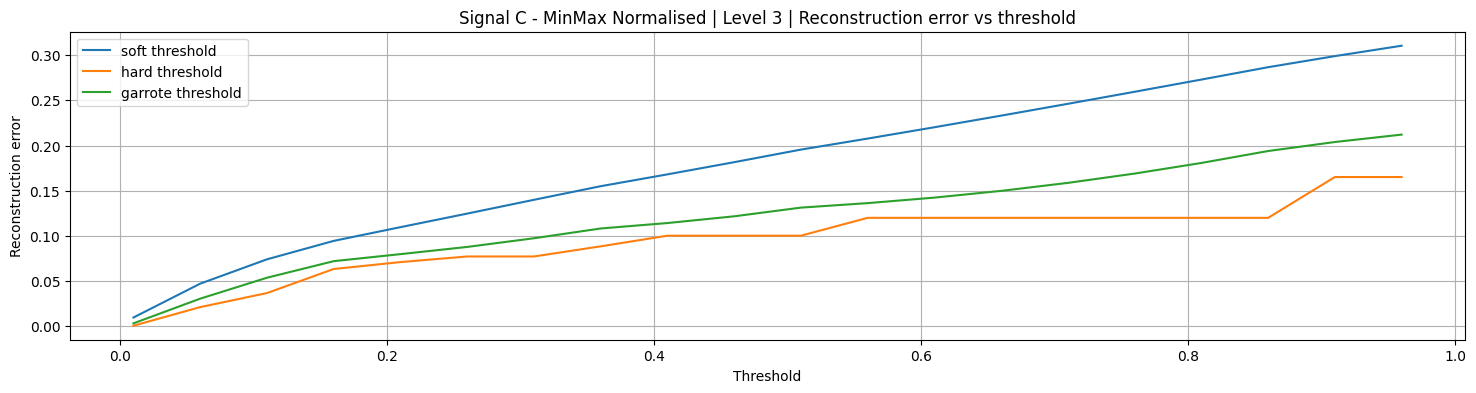

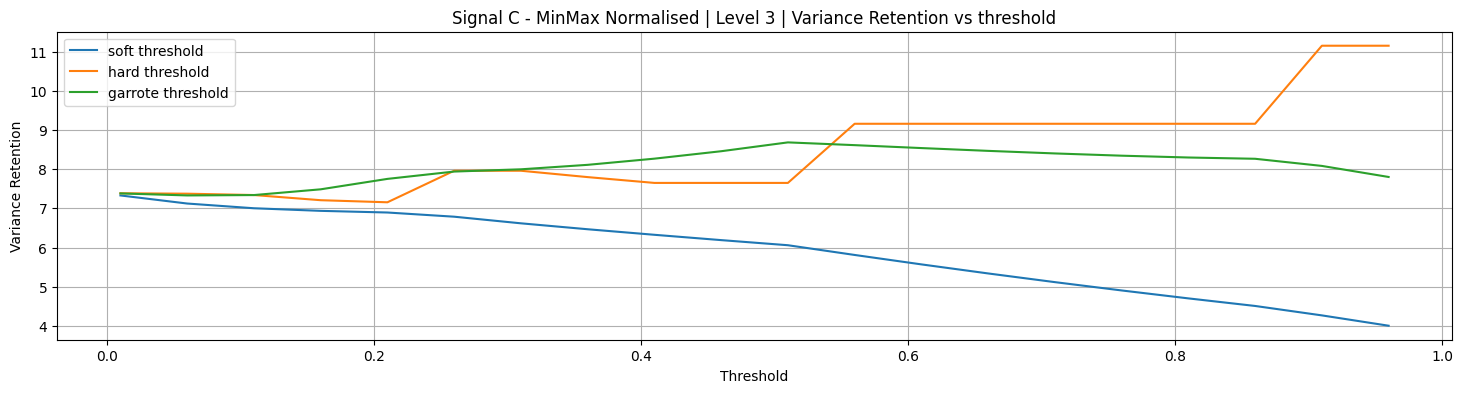

In [154]:

thresholds = []
variance_retention_soft = []
reconstruction_error_soft = []

threshss = np.arange(0.01,1,0.05)
threshss

for threshold in threshss:
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(min_max_signal_C, threshold, "soft", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(min_max_signal_C, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(min_max_signal_C)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_soft.append(err)
    variance_retention_soft.append(variance_retention)

thresholds = []
variance_retention_hard = []
reconstruction_error_hard = []

for threshold in threshss:
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(min_max_signal_C, threshold, "hard", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(min_max_signal_C, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(min_max_signal_C)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_hard.append(err)
    variance_retention_hard.append(variance_retention)


thresholds = []
variance_retention_garrote = []
reconstruction_error_garrote = []

for threshold in threshss:
    # Haar wavelet decomposition
    coeffs = lossy_decomposition(min_max_signal_C, threshold, "garrote", 3)

    # Reconstruction
    reconstructed_time_series = pywt.waverec(coeffs, 'haar')

    # Method 1: Reconstruction Error (RMSE)
    thresholds.append(threshold)
    err = np.sqrt(mean_squared_error(min_max_signal_C, reconstructed_time_series))
    variance_retention = np.sum([np.var(c) for c in coeffs]) / np.var(min_max_signal_C)
    # entropy_coeffs = [entropy(c) for c in coeffs]
    reconstruction_error_garrote.append(err)
    variance_retention_garrote.append(variance_retention)

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds, reconstruction_error_soft, label="soft threshold")
plt.plot(thresholds, reconstruction_error_hard, label="hard threshold")
plt.plot(thresholds, reconstruction_error_garrote, label="garrote threshold")
plt.title('Signal C - MinMax Normalised | Level 3 | Reconstruction error vs threshold')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Reconstruction error')
plt.grid(True)
plt.show()

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(thresholds, variance_retention_soft, label="soft threshold")
plt.plot(thresholds, variance_retention_hard, label="hard threshold")
plt.plot(thresholds, variance_retention_garrote, label="garrote threshold")
plt.title('Signal C - MinMax Normalised | Level 3 | Variance Retention vs threshold')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Variance Retention')
plt.grid(True)
plt.show()
